In [10]:
import numpy as np
from mlxtend.evaluate import permutation_test

x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 4, 1, 5, 6, 7])

print('Observed pearson R: %.2f' % np.corrcoef(x, y)[1][0])


p_value = permutation_test(x, y,
                           method='exact',
                           func=lambda x, y: np.corrcoef(x, y)[1][0],
                           seed=0)
print('P value: %.2f' % p_value)

Observed pearson R: 0.81
P value: 0.10


In [43]:
from scipy.spatial.distance import jensenshannon
import numpy as np
from mlxtend.evaluate import permutation_test

x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 4, 1, 5, 6, 7])

# JSD function
def jsd(x, y):
    return jensenshannon(x, y)

# Perform permutation test
p_value = permutation_test(x, y,
                           method='exact',
                           func=jsd,
                        #    num_rounds=1000,
                           seed=0)

print('JSD P value: %.2f' % p_value)

JSD P value: 0.91


In [42]:
import numpy as np
from scipy.linalg import norm
from scipy.spatial.distance import euclidean

_SQRT2 = np.sqrt(2)     # sqrt(2) with default precision np.float64


def hellinger1(p, q):
    return norm(np.sqrt(p) - np.sqrt(q)) / _SQRT2


from scipy.spatial.distance import jensenshannon
import numpy as np
from mlxtend.evaluate import permutation_test

x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 4, 1, 5, 6, 7])


# Perform permutation test
p_value = permutation_test(x, y,
                           method='exact',
                           func=hellinger1,
                        #    num_rounds=1000,
                           seed=0)

print('Hellinger P value: %.2f' % p_value)

Hellinger P value: 0.92


In [44]:
def bhattacharyya(x, y):
    return -np.log(np.sum(np.sqrt(x * y)))

# Perform permutation test using Bhattacharyya distance
p_value = permutation_test(x, y,
                           method='approximate',
                           func=bhattacharyya,
                           num_rounds=1000,
                           seed=0)

print('Bhattacharyya Distance P value: %.2f' % p_value)

Bhattacharyya Distance P value: 0.96


In [1]:
# Mandatory
import pandas as pd
import numpy as np
# from anytree import Node, search, PreOrderIter, RenderTree
import glob
from collections import defaultdict

In [2]:
import glob
import pandas as pd
# Mandatory
import pandas as pd
import numpy as np
# from anytree import Node, search, PreOrderIter, RenderTree
import glob
from collections import defaultdict

def function_1(file_path: str, is_pickle: bool) -> pd.DataFrame:
    data_file = glob.glob(file_path)
    if len(data_file) != 0:
        try:
            if is_pickle:
                return pd.read_pickle(data_file[0]).reset_index(drop=True)
            else:
                return pd.read_csv(data_file[0], encoding='utf-8', on_bad_lines='warn')
        except UnicodeDecodeError:
            return pd.read_csv(data_file[0], encoding='ISO-8859-1', on_bad_lines='warn')
    else:
        print("File not available, please insert the correct path.")
        return pd.DataFrame()

# Calling the function
df_origin = function_1("NLME.csv", False)
df_origin.head(3)

C:\Users\aqtak\AppData\Local\Temp\ipykernel_10912\2896986171.py:17: ParserWarning: Skipping line 2191: expected 52 fields, saw 53
Skipping line 3300: expected 52 fields, saw 53
Skipping line 4875: expected 52 fields, saw 53
Skipping line 7510: expected 52 fields, saw 53
Skipping line 7511: expected 52 fields, saw 53
Skipping line 9940: expected 52 fields, saw 53
Skipping line 11084: expected 52 fields, saw 53
Skipping line 15543: expected 52 fields, saw 53
Skipping line 15586: expected 52 fields, saw 238441

  return pd.read_csv(data_file[0], encoding='utf-8', on_bad_lines='warn')
C:\Users\aqtak\AppData\Local\Temp\ipykernel_10912\2896986171.py:19: ParserWarning: Skipping line 2191: expected 52 fields, saw 53
Skipping line 3300: expected 52 fields, saw 53
Skipping line 4875: expected 52 fields, saw 53
Skipping line 7510: expected 52 fields, saw 53
Skipping line 7511: expected 52 fields, saw 53
Skipping line 9940: expected 52 fields, saw 53
Skipping line 11084: expected 52 fields, saw 53

,Company,Description,IntegrityLevel,LogonGuid,LogonId,ParentProcessGuid,ParentProcessId,ProcessGuid,ProcessId,Product,...,DestinationPortName,Initiated,Protocol,SourcePortName,TargetFilename,TargetProcessGuid,TargetImage,StartFunction,CreationUtcTime,PreviousCreationUtcTime;;
0,",,,,,,,{F44F4893-37AB-62B3-4700-000000001E00},...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,",,,,,,,{F44F4893-37AB-62B3-4700-000000001E00},...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,",,,,,,,{F44F4893-37AB-62B3-4700-000000001E00},...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_origin.columns

Index(['Company', 'Description', 'IntegrityLevel', 'LogonGuid', 'LogonId',
       'ParentProcessGuid', 'ParentProcessId', 'ProcessGuid', 'ProcessId',
       'Product', 'TerminalSessionId', 'User', 'EventID', 'UtcTime',
       'host_name', 'node_id', 'timestamp', 'parent_node_id', 'label', 'Image',
       'is_managed', 'replaced', 'hdr_modified', 'total_modified', 'patched',
       'iat_hooked', 'implanted_pe', 'implanted_shc', 'unreachable_file',
       'other', 'FileVersion', 'ImageLoaded', 'OriginalFileName', 'Signature',
       'SignatureStatus', 'Signed', 'EventType', 'RuleName', 'TargetObject',
       'DestinationHostname', 'DestinationIp', 'DestinationPort',
       'DestinationPortName', 'Initiated', 'Protocol', 'SourcePortName',
       'TargetFilename', 'TargetProcessGuid', 'TargetImage', 'StartFunction',
       'CreationUtcTime', 'PreviousCreationUtcTime;;'],
      dtype='object')

In [4]:
# check unique value in label
df_origin['label'].unique()

array([nan,  0.,  1.])

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

def get_features(df, features_count=1):
    df['label'] = df['label'].replace(1,1)
    df['label'] = df['label'].replace(0,0)
    ndf = df.loc[:, df.isnull().mean() < .8]
    ndf = ndf.drop_duplicates()
    ndf = ndf.drop(['Image', 'node_id','ProcessGuid','ProcessId', 'UtcTime', 'timestamp', 'parent_node_id', 'host_name'],axis = 1)
    for column in ndf:
        if column == 'EventID' or column == 'label' or column == 'TargetFilename':
            continue
        ndf[column] = (ndf[column].notnull()).astype(int)
    ndf['TargetFilename'] = ndf['TargetFilename'].str.len()
    ndf.loc[ndf['TargetFilename'].isnull(), 'TargetFilename'] = 0
    ndf = ndf.reset_index(drop=True)
    benign_df = ndf[ndf['label'] == 0]
    malware_df = ndf[ndf['label'] == 1]
    test_df = pd.concat([benign_df.iloc[:malware_df.shape[0],:], malware_df])
    train_df = benign_df.iloc[malware_df.shape[0]:,:]
    return ndf, train_df, test_df

new_df, train_df, test_df = get_features(df_origin, features_count=1)
# # remove the row null
new_df = new_df.dropna()
new_df

,Company,Description,IntegrityLevel,LogonGuid,LogonId,ParentProcessGuid,ParentProcessId,Product,TerminalSessionId,User,...,hdr_modified,total_modified,patched,iat_hooked,implanted_pe,implanted_shc,unreachable_file,other,TargetFilename,PreviousCreationUtcTime;;
160,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0.0,1
161,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0.0,1
162,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0.0,1
163,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0.0,1
164,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44891,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0.0,1
44892,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0.0,1
44893,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0.0,1
44894,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0.0,1


In [6]:
# Determine the split index for 80% of the data
split_index = int(len(new_df) * 0.5)

# Split the data into X_con (first 80%) and X_tre (remaining 30%)
X_con = new_df.iloc[:split_index].reset_index(drop=True)
X_tre = new_df.iloc[split_index:].reset_index(drop=True)

# Separate the 'label' column from X_con and X_tre
y_con = X_con.pop('label')
y_tre = X_tre.pop('label')

# Convert DataFrames to NumPy arrays
X_con_np = X_con.to_numpy()
X_tre_np = X_tre.to_numpy()
y_con_np = y_con.to_numpy()
y_tre_np = y_tre.to_numpy()

# Print the shapes to verify the split
print("Shape of X_con_np:", X_con_np.shape)
print("Shape of y_con_np:", y_con_np.shape)
print("Shape of X_tre_np:", X_tre_np.shape)
print("Shape of y_tre_np:", y_tre_np.shape)

print(X_con_np[0])
print(y_con_np[1])
print('====================')

# Let's Check the data
def perform_eda(array_name, array):
    print(f"EDA for {array_name}")
    # Check shape
    print("Shape:", array.shape)

    # Check data type
    print("Data Type:", array.dtype)

    # If the data is numerical, calculate basic statistics
    if np.issubdtype(array.dtype, np.number):
        print("Mean:", np.mean(array))
        print("Median:", np.median(array))
        print("Std Dev:", np.std(array))
        print("Min:", np.min(array))
        print("Max:", np.max(array))

    # Calculate basic statistics for each column
    print("Mean of each column:", np.mean(array, axis=0))
    print("Median of each column:", np.median(array, axis=0))
    print("Std Dev of each column:", np.std(array, axis=0))
    print("Min of each column:", np.min(array, axis=0))
    print("Max of each column:", np.max(array, axis=0))
    # Check for missing values
    print("Missing values:", np.isnan(array).sum())
    print("\n")

perform_eda('X_con_np ', X_con_np)
print('====================')

def check_labels(array_name, array):
    print(f"Checking labels for {array_name}")
    # Check shape
    print("Shape:", array.shape)

    # Check data type
    print("Data Type:", array.dtype)

    # Count occurrences of each value
    unique, counts = np.unique(array, return_counts=True)
    print("Counts of each label:", dict(zip(unique, counts)))

    print("\n")

# Call the function for each label array
check_labels('y_con', y_con_np)
check_labels('y_tre', y_tre_np)

Shape of X_con_np: (21298, 23)
Shape of y_con_np: (21298,)
Shape of X_tre_np: (21299, 23)
Shape of y_tre_np: (21299,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 13.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.]
0.0
EDA for X_con_np 
Shape: (21298, 23)
Data Type: float64
Mean: 1.8498185173541504
Median: 1.0
Std Dev: 6.785857680752241
Min: 0.0
Max: 151.0
Mean of each column: [ 0.34806085  0.34834257  0.34871819  0.34871819  0.34871819  0.34871819
  0.34871819  0.34853038  0.34871819  0.34871819  7.35223965  0.99953047
  0.99953047  0.99953047  0.99953047  0.99953047  0.99953047  0.99953047
  0.99953047  0.99953047  0.99953047 20.81810499  0.89421542]
Median of each column: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 11.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.]
Std Dev of each column: [4.76355429e-01 4.76445194e-01 4.76564596e-01 4.76564596e-01
 4.76564596e-01 4.76564596e-01 4.76564596e-01 4.76504936e-01
 4.76564596e-01 4.76564596e-01 4.89329995e+00 2.16634992e-02
 2.16634992e-02 

# ML

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Fit the model on the control data (X_con, y_con)
rf_model.fit(X_con, y_con)

# Make predictions on the treatment data (X_tre)
y_pred = rf_model.predict(X_tre)

# Evaluate the model's performance
accuracy = accuracy_score(y_tre, y_pred)
print("Accuracy:", accuracy)


# Print a classification report and confusion matrix
print(classification_report(y_tre, y_pred))
print(confusion_matrix(y_tre, y_pred))


Accuracy: 0.8392882294943425
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     17835
         1.0       0.52      0.20      0.29      3464

    accuracy                           0.84     21299
   macro avg       0.69      0.58      0.60     21299
weighted avg       0.80      0.84      0.81     21299

[[17185   650]
 [ 2773   691]]


In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(y_tre, y_pred, pos_label=1)

roc_auc = roc_auc_score(y_tre, y_pred)
print("ROC AUC:", roc_auc)


# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC: 0.5815175887384422


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model on the control data (X_con, y_con)
knn_model.fit(X_con, y_con)

# Make predictions on the treatment data (X_tre)
y_pred = knn_model.predict(X_tre)

# Evaluate the model's performance
accuracy = accuracy_score(y_tre, y_pred)
print("Accuracy:", accuracy)

# Print a classification report and confusion matrix
print(classification_report(y_tre, y_pred))
print(confusion_matrix(y_tre, y_pred))

Accuracy: 0.8360016902201981
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91     17835
         1.0       0.49      0.23      0.31      3464

    accuracy                           0.84     21299
   macro avg       0.68      0.59      0.61     21299
weighted avg       0.80      0.84      0.81     21299

[[17011   824]
 [ 2669   795]]


ROC AUC: 0.5916510873020652


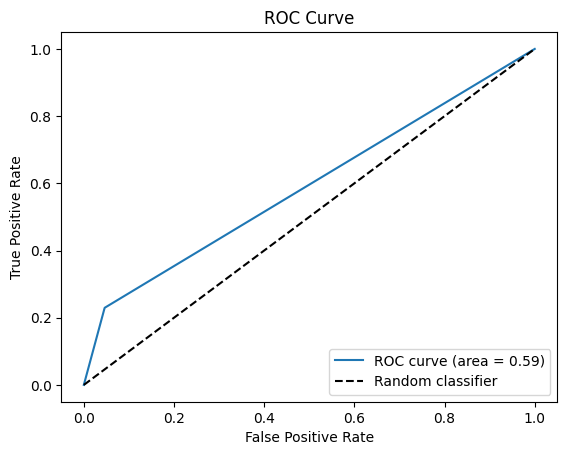

In [9]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(y_tre, y_pred, pos_label=1)

roc_auc = roc_auc_score(y_tre, y_pred)
print("ROC AUC:", roc_auc)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_tre, y_pred)
roc_auc = auc(fpr, tpr)


# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# OWAD

In [15]:
!git clone https://github.com/Lala14528/OWAD.git

Cloning into 'OWAD'...


In [17]:
!pip install -r OWAD/requirements.txt

  Using cached matplotlib-3.4.3.tar.gz (37.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [16 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\aqtak\AppData\Local\Temp\pip-install-jj1awx6m\matplotlib_d3aa0e47a6b84a35a66ce265adb94840\setup.py", line 54, in <module>
          __version__ = versioneer.get_version()
                        ^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\aqtak\AppData\Local\Temp\pip-install-jj1awx6m\matplotlib_d3aa0e47a6b84a35a66ce265adb94840\versioneer.py", line 1410, in get_version
          return get_versions()["version"]
                 ^^^^^^^^^^^^^^
        File "C:\Users\aqtak\AppData\Local\Temp\pip-install-jj1awx6m\matplotlib_d3aa0e47a6b84a35a66ce265adb94840\versioneer.py", line 1344, in get_versions
          cfg = get_config_from_root(root)
                ^^^^^^^^^^^^^^^^^^^^^^^^^

# RUN OWAD

In [7]:
%load_ext autoreload
%autoreload 2
## import packages
import sys
import warnings
import os

warnings.filterwarnings('ignore')
# Assuming your OWAD folder is in your Google Drive
base_path = '/OWAD'

sys.path.append(os.path.join(base_path, 'admodels'))
sys.path.append(os.path.join(base_path, 'modules'))
sys.path.append(os.path.join(base_path, 'baselines'))
sys.path.append(base_path)
# Add the OWAD folder to the Python path
# sys.path.append(os.path.abspath('/path/to/OWAD'))

# Now you can import myutils
import OWAD.myutils
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import _pickle as pkl
import OWAD.admodels.AERMSE as AE

## import OWAD moudles
from OWAD.moudles.calibrator import Calibrator
from OWAD.moudles.shifthunter import ShiftHunter
import OWAD.myutils as utils

In [8]:
# import MinMaxScaler
import torch
from sklearn.preprocessing import MinMaxScaler

train_num = 20000
X_ben = X_con_np[y_con_np==0]
X_train = X_ben[:train_num]
print(f"Number of benign samples: {X_ben.shape[0]}")
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
'''
 AE params
  lr: 1.e-5
  epoches: 20
'''
model, thres = AE.train(X_train, X_train.shape[-1], epoches=10,lr=1.e-5)

# Weighted MSE - CE
# model, thres = AE.train(X_train, X_train.shape[-1], torch.rand(23), epoches=30,lr=1.e-5)

Number of benign samples: 17354
epoch:0/10 |Loss: 0.8555602431297302
epoch:1/10 |Loss: 0.858307421207428
epoch:2/10 |Loss: 0.8555783629417419
epoch:3/10 |Loss: 0.847709059715271
epoch:4/10 |Loss: 0.8532425761222839
epoch:5/10 |Loss: 0.8509922027587891
epoch:6/10 |Loss: 0.8535711169242859
epoch:7/10 |Loss: 0.85243821144104
epoch:8/10 |Loss: 0.8510710597038269
epoch:9/10 |Loss: 0.8517952561378479
max AD score 1.0009755
thres: 1.0009755


Original Performance Control
roc_auc: 0.6547672953210804


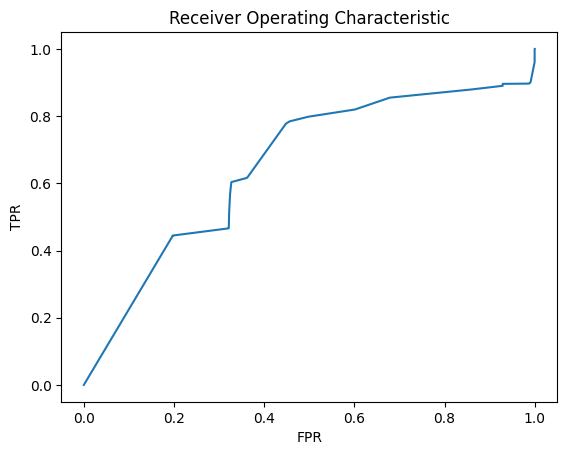

Before Adaptation Treatment
roc_auc: 0.6509194333999564


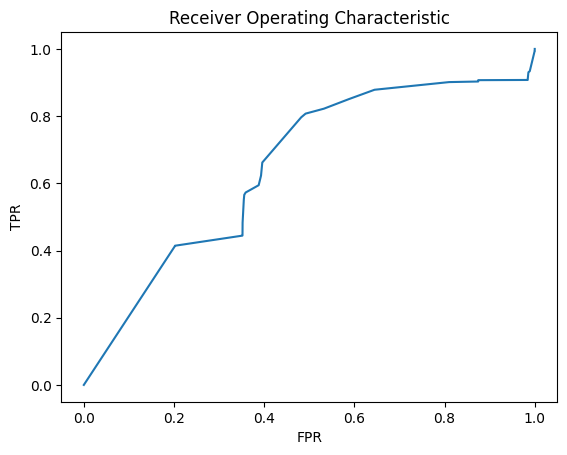

In [11]:
%matplotlib inline
X_0, y_0 = scaler.transform(X_con_np), y_con_np

X_1, y_1 = scaler.transform(X_tre_np), y_tre_np

## Test Original Performance @Control and @Treatment
print('Original Performance Control')
y_pred_0, y_prob_0 = AE.test(model, thres, X_0)
utils.multi_metrics(y_prob_0, y_0, thres*1.2)

print('Before Adaptation Treatment')
y_pred_1, y_prob_1 = AE.test(model, thres, X_1)
utils.multi_metrics(y_prob_1, y_1, thres*1.2)

vali_num = 50000
rmse_c = y_prob_0[:vali_num]
rmse_t = y_prob_1[:vali_num]
X_con = X_0[:vali_num]
X_tre = X_1[:vali_num]

NOTICE: Initialize OWAD Calibrator Under **Isotonic** Method!
NOTICE: uncalibrated Probs is **MALICIOUS** confidence
NOTICE: Initilize OWAD Shift Handler Under **Tab** Mode!
bh Value : 0.006452239573495068
Shift! P-value is 0.000999000999000999
Visualize Shift:


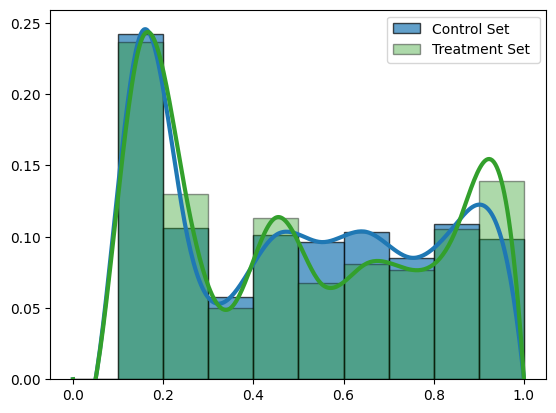

In [12]:
## Detect whether shift happens between Control and Treatment
from OWAD.moudles.shifthunter import ShiftHunter

utils.set_random_seed()
cb = Calibrator(X_con_np, method='Isotonic')
cb.set_calibrator(rmse_c, is_P_mal=True)
sh = ShiftHunter(rmse_c, rmse_t, cb, ad_type='Tab')
t = utils.get_params('ShiftDetector')['test_thres']
p_value = sh.permu_test(test_formula='bh')
if p_value >= t:
    print("Non-shift, skip explain and adaptation!")
else:
    print('Shift! P-value is', p_value)
print("Visualize Shift:")
sh.visualize_hists()

step:0 |Loss:21.0000 |Accuracy_Loss:1.0000 |Overhead_Loss:1.0000 |Determinism_Loss:1.0000 |M_c num: 10589 |M_t num: 10761
step:10 |Loss:10.3852 |Accuracy_Loss:0.2880 |Overhead_Loss:1.0173 |Determinism_Loss:0.9784 |M_c num: 10850 |M_t num: 10987
step:20 |Loss:9.8581 |Accuracy_Loss:0.2561 |Overhead_Loss:1.0067 |Determinism_Loss:0.9833 |M_c num: 10553 |M_t num: 10984
step:30 |Loss:9.8775 |Accuracy_Loss:0.2615 |Overhead_Loss:0.9940 |Determinism_Loss:0.9846 |M_c num: 10169 |M_t num: 10999
step:40 |Loss:9.9404 |Accuracy_Loss:0.2700 |Overhead_Loss:0.9807 |Determinism_Loss:0.9875 |M_c num: 9842 |M_t num: 10970
step:50 |Loss:9.7513 |Accuracy_Loss:0.2609 |Overhead_Loss:0.9718 |Determinism_Loss:0.9793 |M_c num: 9528 |M_t num: 10940
step:60 |Loss:9.8587 |Accuracy_Loss:0.2719 |Overhead_Loss:0.9603 |Determinism_Loss:0.9790 |M_c num: 9195 |M_t num: 10925
step:70 |Loss:9.4868 |Accuracy_Loss:0.2516 |Overhead_Loss:0.9470 |Determinism_Loss:0.9780 |M_c num: 8853 |M_t num: 10889
step:80 |Loss:8.5864 |Accur

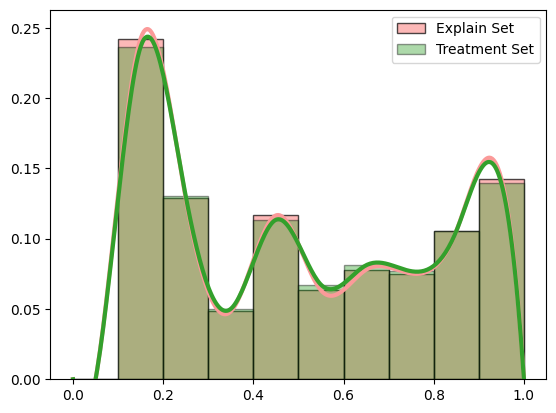

** Warning: No Need to Clip <remain_X_t> according to <label_num>
   (label_num:20000, remain_X_t:10758, X_t:21299)
NOTICE: simulating labelling...
Filter 1854 anomalies in remain_X_tre
Remain X_c.shape (13492, 23) X_t.shape (8904, 23)
Adapter: Begin Processing ... 
 Estimating Params Weight:0/2240
 Estimating Params Weight:2000/2240
epoch:0 ,step:0 |Distrib_Loss:26.0335 rmse_vec:3.3186
epoch:1 ,step:0 |Distrib_Loss:30.1340 rmse_vec:3.3186
epoch:2 ,step:0 |Distrib_Loss:30.1986 rmse_vec:3.3186
epoch:3 ,step:0 |Distrib_Loss:27.8145 rmse_vec:3.3186
epoch:4 ,step:0 |Distrib_Loss:33.2050 rmse_vec:3.3185
epoch:5 ,step:0 |Distrib_Loss:25.7606 rmse_vec:3.3185
epoch:6 ,step:0 |Distrib_Loss:27.1542 rmse_vec:3.3185
epoch:7 ,step:0 |Distrib_Loss:26.6211 rmse_vec:3.3184
epoch:8 ,step:0 |Distrib_Loss:29.3875 rmse_vec:3.3184
epoch:9 ,step:0 |Distrib_Loss:25.8463 rmse_vec:3.3184


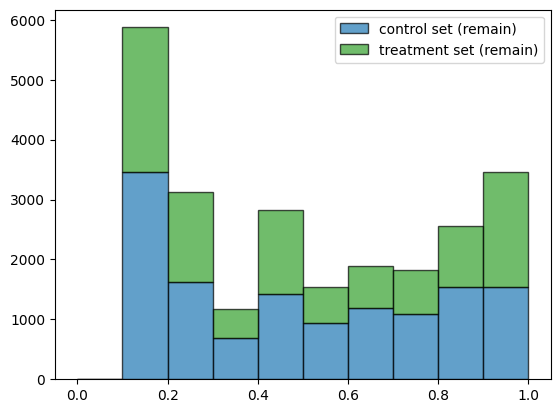

In [13]:
## Shift explanation and adaptation
utils.set_random_seed()
ohd_bgt = 20000
exp_result = sh.explainer(X_1, y_1[:vali_num], label_num = ohd_bgt, lr=5., steps=100, plot_compose=True, 
                            acc_wgt = 15, ohd_wgt = 5, det_wgt = 1,) # , auto_cali_thres=True
sh.adapter(model)

After OWAD Adaptation:
roc_auc: 0.649341142601121


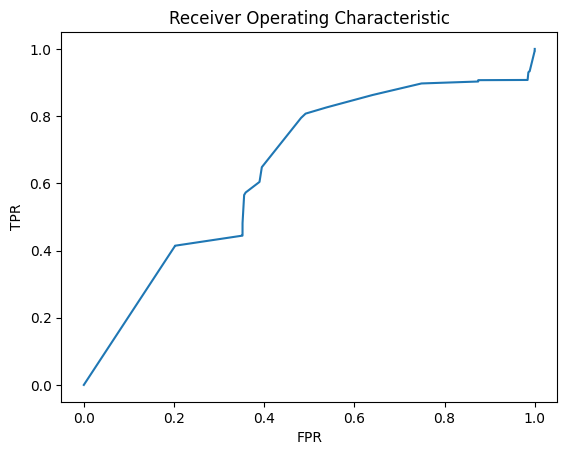

In [14]:
## Test the performance after OWAD adaptation
from sklearn import metrics

print('After OWAD Adaptation:')
pred_tre_1, prob_tre_1 = AE.test(sh.model, thres, X_1)
# print('f1-score:', metrics.f1_score(y_1, pred_tre),
#       'precision:', metrics.precision_score(y_1, pred_tre),
#       'recall:', metrics.recall_score(y_1, pred_tre)
#      )
utils.multi_metrics(prob_tre_1, y_1, thres*1.5)

NOTICE: Initilize OWAD Shift Handler Under **Tab** Mode!
bh Value : 0.028210318254852502
Shift! P-value is 0.000999000999000999
Visualize Shift:


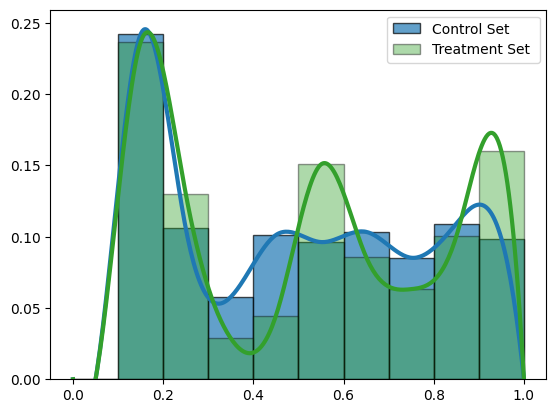

In [16]:
rmse_t_owad = prob_tre_1[:vali_num]

sh_owad = ShiftHunter(rmse_c, rmse_t_owad, cb, ad_type='Tab')
t = utils.get_params('ShiftDetector')['test_thres']
p_value = sh_owad.permu_test(test_formula='bh')
if p_value >= t:
    print("Non-shift, skip explain and adaptation!")
else:
    print('Shift! P-value is', p_value)
print("Visualize Shift:")
sh_owad.visualize_hists()

# Retrain

epoch:0/10 |Loss: 0.79330974817276
epoch:1/10 |Loss: 0.7862718105316162
epoch:2/10 |Loss: 0.8092718720436096
epoch:3/10 |Loss: 0.7649853825569153
epoch:4/10 |Loss: 0.7969094514846802
epoch:5/10 |Loss: 0.7685021162033081
epoch:6/10 |Loss: 0.7700375914573669
epoch:7/10 |Loss: 0.7525134682655334
epoch:8/10 |Loss: 0.7691072821617126
epoch:9/10 |Loss: 0.7843573093414307
max AD score 0.93805635
thres: 0.93805635
After Retraining:
roc_auc: 0.6350410097435368


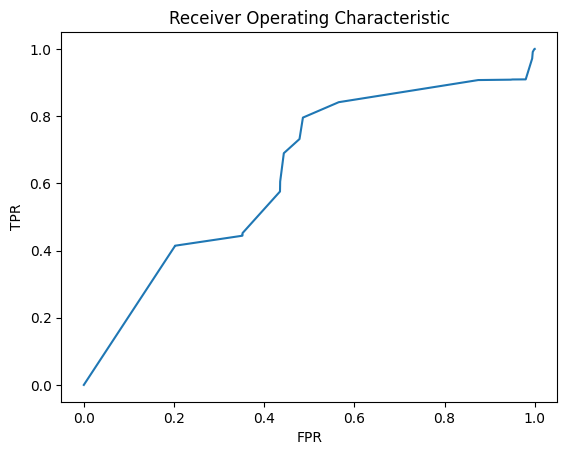

In [16]:
## retraining with all old samples and `ohd_bgt` new samples
utils.set_random_seed()
X_retrain = np.concatenate((X_0[:train_num],X_1[:ohd_bgt]))
retrain_model, retrain_thres = AE.train(X_retrain, X_retrain.shape[-1],epoches=10,lr=1e-5)

## test the performance of retraining model
print('After Retraining:')
y_pred, y_prob = AE.test(retrain_model, retrain_thres, X_1)
utils.multi_metrics(y_prob, y_1, retrain_thres*1.5)